#Pandas数据分析基本操作

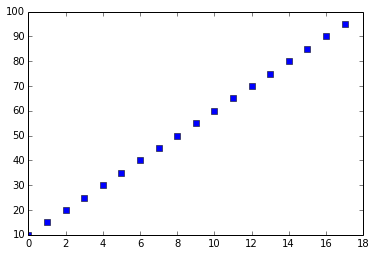

In [225]:
import matplotlib.pyplot as plt
%matplotlib inline

#最简单的数学绘图
plt.plot(range(10,100,5),'bs')# b代表blue,s代表squre。还有rgk,-^_o可用。

In [9]:
cd '~/Desktop/names/'

/Users/chengang/Desktop/names


本案例所用公开数据可以在这里下载：[1880-2010全美婴儿姓名频率数据](http://phylab.fudan.edu.cn/lib/exe/fetch.php?media=course:python:names.rar)

In [13]:
import glob,csv

f=open('zong.csv','wb')
m=csv.writer(f)
txts=glob.glob('*.txt')

#读取全部数据文件到一个单一 zong.csv 文件中
for file in txts[:]:
    c_txt = open(file,'rb')
    for line_num, line in enumerate(c_txt):
        if line_num > 0:
            m.writerow(line.strip().split(','))

In [214]:
import pandas as pd
nameAll = pd.read_csv('zong.csv', names= ['name','sex','births'], sep=',') #读入数据并添加names标头, sep注明分隔符为','。
nameAll.births.sum()#计算1880-2010全美总出生人数

316679301

In [194]:
nameAll.groupby('sex').births.sum()#按性别分组并计算出生人数

sex
F    154266714
M    162412587
Name: births, dtype: int64

In [195]:
years = range(1880,2011)
pieces =[]
columns = names = ['name','sex','births']
for year in years:
    path ='yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    frame['year']=year#添加一个例保存year信息
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)#concat整合frame到DataFram,ignore_index 忽略原始行号。
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [196]:
# import numpy as np
total_births = pd.pivot_table(names,index=['year'],values='births',columns='sex',aggfunc=np.sum)
total_births.head()
#names.groupby('sex').births.sum()
#total_births = names.pivot_table('births',rows='years',cols='sex',aggfunc=np.sum)
#DataFrame.pivot_table and crosstab‘s rows and cols keyword arguments were removed in favor of index and columns

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


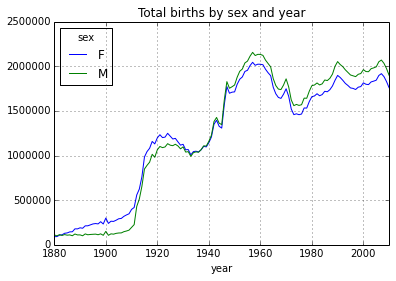

In [197]:
total_births.plot(title='Total births by sex and year')

Pandas的数据类型：   
Series由pandas.Series或numpy.ndarray创建。   
二维numpy.ndarray
DataFrame由pd.DataFrame(np.random.randn(10,4)，index=range(0,10), columns=list('ABCD'))创建一个十行四列的数据帧。
结构化的structured arrays

In [217]:
pd.DataFrame(np.random.randn(10,4),index=range(0,10), columns=list('ABCD'))#index 声明索引，columns声明列头。

,A,B,C,D
0,0.994951,-1.063004,-0.486925,0.111906
1,-0.652759,-0.498696,-0.133403,-0.507192
2,0.266000,-0.097322,-0.355959,-0.805584
3,0.640702,1.915005,-0.771830,-0.688007
4,-0.248969,0.635975,1.966264,0.499250
5,-0.355261,0.417366,-0.624440,1.212714
6,0.179884,-1.595185,0.899878,-0.879921
7,-1.562678,-1.411798,-2.646858,0.426466
8,-0.575949,-1.094777,0.927945,-0.616079
9,-0.624201,-1.331002,0.046417,-0.497738


DataFrame.index #标识行，index就是每一行数据的id，可以标识每一行的唯一值。
DataFrame.columns #标识列
DataFrame.shape #维度
DateFrame.value #值
DateFrame.describe() #描述

In [224]:
names.sort(columns='year',ascending=False).head()#Sort根据year列的值来排序，ascending指定倒序。

,name,sex,births,year
1690783,Zzyzx,M,5,2010
1668230,Ashani,F,9,2010
1668216,Arayla,F,9,2010
1668217,Areesha,F,9,2010
1668218,Areona,F,9,2010


In [198]:
#Select选取矩阵的第1到5行。   
names.iloc[0:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [199]:
#Select选取矩阵的第1到5行，在选取1到2列。（主意中间是用逗号隔开行参数与列参数）。
names.iloc[0:5,0:2]

,name,sex
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Minnie,F


In [200]:
#Select选取举证的第1，3，4行，在截取第1，3列。
names.iloc[[0,2,3],[0,2]]

,name,births
0,Mary,7065
2,Emma,2003
3,Elizabeth,1939


In [201]:
#Drop删去第3行。
names.drop(2).head(3)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
3,Elizabeth,F,1939,1880


In [191]:
#基本运算，并添加到新列。
names['sum']=names['births']+names['year']#（）选行,[]选列。
names.head(3)

,name,sex,births,year,sum
0,Mary,F,7065,1880,8945
1,Anna,F,2604,1880,4484
2,Emma,F,2003,1880,3883


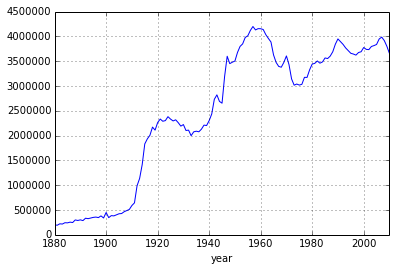

In [215]:
#Groupby利用标识列分组
names.groupby('year').births.sum().plot()

In [216]:
#导出到csv文件，encodeing='utf-8',index=False 去掉pandas索引
names.to_csv('/Users/chengang/Desktop/names/e.csv', encodeing='utf-8', index=False )